In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def moving_average(data, window_size):
    """Compute the moving average of a given data array with a specified window size."""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def cascade_moving_average(data, window_sizes):
    """Apply a cascade of moving average filters to the data."""
    d = data.copy()
    for window_size in window_sizes:
        smoothed_data = moving_average(d, window_size)
    return smoothed_data

In [3]:
data_path = "data/mc_test_2_60bpm.csv"
df = pd.read_csv(data_path)
a_mag = df['mag'] 
print(f"length of mag is {len(a_mag)}")

FileNotFoundError: [Errno 2] No such file or directory: 'data/mc_test_2_60bpm.csv'

In [24]:
#filter parameters
low_cut_off = 100 # removes muscle artifacts and baseline wander
high_cut_off = -1
filter_order = 5   # 9th order has been used in literature?
filter_type =  "high"  #"bandpass"
sampling_rate = 6000
window_sizes = [20, 5, 20]

In [25]:
# Apply the cascade moving average filter
smoothed_data = cascade_moving_average(a_mag, window_sizes)

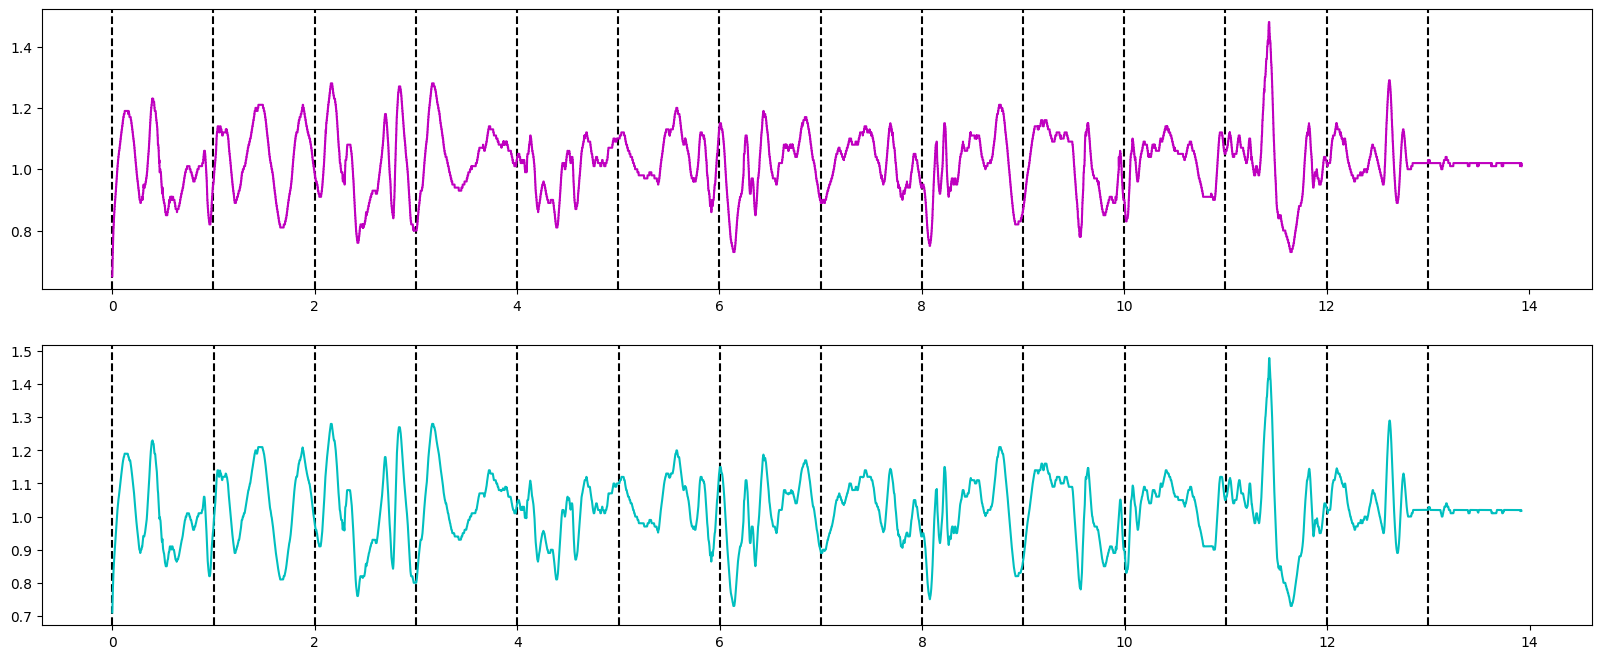

In [26]:
# plot the graphs
fig, ax = plt.subplots(2,1, figsize=(20, 8))

time_step = 1 / sampling_rate  # in seconds

# Create the time index array
time = np.arange(len(a_mag)) * time_step
s_time = np.arange(len(smoothed_data)) * time_step
x_positions = np.arange(0, len(a_mag)/sampling_rate, 1)  # Positions at every second from 0 to 10
# Plot vertical lines at the specified positions
for x in x_positions:
    ax[0].axvline(x=x, color='black', linestyle='--')
    ax[1].axvline(x=x, color='black', linestyle='--')

# add plots
ax[0].plot(time, a_mag, color="m")
ax[1].plot(s_time, smoothed_data, color="c")